# Task 1 and 2

In [1]:
import scipy.sparse as sparse
import scipy.stats as stats
import numpy as np
import scipy as sp
from numpy import linalg
from numpy.linalg import norm as Norm
from scipy.sparse.linalg import norm as sNorm


from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler\

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sb
from sklearn.preprocessing import StandardScaler
import time

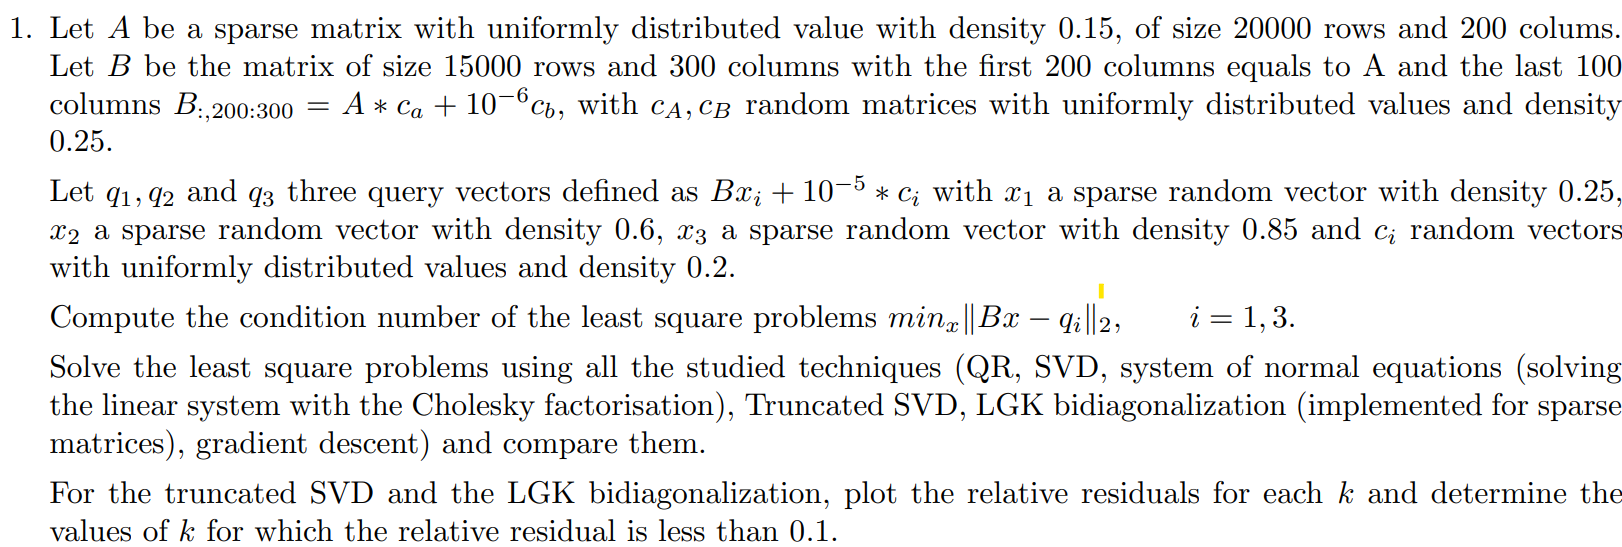

# Task 1

## Generating matrix A

In [2]:
# The size of matrix A is 2000*20, with the density of 0.15
A = sparse.random(2000, 20, format='csr', density = 0.15, random_state = None)
# To understand the size of the matix
print("The shape of the matrix A: \n", A.shape)

The shape of the matrix A: 
 (2000, 20)


In [3]:
# To compute with the matrix A, C_a has column is 10 and number of rows is 20.
C_a = sparse.random(20, 10, format='csr', density=0.25)
print("The shape of the C_a: \n", C_a.shape)

# to compute with the matrix A * C_a, so we C_b should be with size of 2000 rows and 10 columns.
C_b = sparse.random(2000, 10, format='csr',density=0.25)
print("The shape of the C_b: \n", C_b.shape)


The shape of the C_a: 
 (20, 10)
The shape of the C_b: 
 (2000, 10)


In [4]:
# The first element i.e., A * C_a
first_element_of_B= A.dot(C_a)
print("Shape of A * C_a size: \n", first_element_of_B.shape)

# the second element i.e., multiplied by 10 power of -6.
exp = 10 ** -6
second_element_of_B = exp * C_b 
print("\n Shape 10 ** -6 * C_b size: \n", second_element_of_B.shape)

# Adding first element + second element 
B200_300 = first_element_of_B + second_element_of_B 
print("\n Shape of A * C_(a )+ 10**(-6) * C_b: \n", B200_300.shape)

Shape of A * C_a size: 
 (2000, 10)

 Shape 10 ** -6 * C_b size: 
 (2000, 10)

 Shape of A * C_(a )+ 10**(-6) * C_b: 
 (2000, 10)


### Generating Matrix 'B'

In [5]:
#For B matrix we are Stack matrix (A and  B200_300) in sequence horizontally
B = sparse.hstack([A, B200_300])
print("The shape of B: \n", B.shape)

The shape of B: 
 (2000, 30)


### Computing the vectors 

In [6]:
#Computing the xi vectors, where i=1,2,3 with respect to the density of 0.25, 0.6 and 0.85

# x1 with density of 0.25 with 30 rows because the B matrix has 30 columns 
x_1 = sparse.random(30,1, format='csr', density = 0.25)
print("The sparse random vector of x1",x_1.shape)

# x2 with denisty of 0.6 because the B matrix has 30 columns 
x_2 = sparse.random(30,1, format='csr', density = 0.6)
print("The sparse random vector of x2",x_2.shape)

# x3 with density of 0.85 because the B matrix has 30 columns 
x_3 = sparse.random(30,1, format='csr', density = 0.85)
print("The sparse random vector of x3",x_3.shape)

The sparse random vector of x1 (30, 1)
The sparse random vector of x2 (30, 1)
The sparse random vector of x3 (30, 1)


In [7]:
#Computing the ci vectors, where i=1,2,3 with respect to the density of 0.2
c_1 = sparse.random(2000,1, format='csr', density = 0.2, random_state = None)
c_2 = sparse.random(2000,1, format='csr', density = 0.2, random_state = None)
c_3 = sparse.random(2000,1, format='csr', density = 0.2, random_state = None)

In [8]:
# This exponistional has multiple with the ci vector for the query 1,2 and 3
exp_1 = 10 **-5
#Computing query vectors
# qi = B*xi + (10 ** -5) * Ci where i = 1,2 and 3
query_1 = B * (x_1) + exp_1 * (c_1)
print(query_1.shape)
query_2 = B * (x_2) + exp_1 * (c_2)
print(query_2.shape)
query_3 = B * (x_3) + exp_1 * (c_3)
print(query_3.shape)

(2000, 1)
(2000, 1)
(2000, 1)


# Least Square Implementation 

## Rank of the matrix 

In [9]:


r = linalg.matrix_rank(B.todense())
print("The rank of matrix is:", r)
n = B.shape[1]
print("n:", n)

The rank of matrix is: 30
n: 30


## QR Least Square Problem

In [10]:
start = time.time()
# Q R
Q,R = linalg.qr(B.todense()) 

sol = []

# R, Q(TRANSPOSE) * B (where B is query_1)
qr_1 = linalg.solve(R, Q.T*(query_1)) # Solve a least square, .T is used as transpose of Q
# the error of least square solution of ||q1 - Bx||
els_qr1 = Norm((query_1 - B*qr_1),2)/sNorm(query_1)
print("the error of least square solution of ||q1 - Bx||", els_qr1)
# appending the solution
sol.append(els_qr1)

# R, Q(TRANSPOSE) * B (where B is query_1)
qr_2 = linalg.solve(R, Q.T*(query_2)) ## Solve a least square, .T is used as transpose of Q
# the error of least square solution of ||q2 - Bx||
els_qr2 = Norm((query_2 - B.todense()*qr_2),2)/sNorm(query_2)
print("the error of least square solution of ||q2 - Bx||", els_qr2)
# appending the solution
sol.append(els_qr2)

# R, Q(TRANSPOSE) * B (where B is query_1)
qr_3 = linalg.solve(R, Q.T*(query_3)) ## Solve a least square, .T is used as transpose of Q
# the error least square solution of ||q3 - Bx||
els_qr3 = linalg.norm((query_3 - B*qr_3),2)/sNorm(query_3)
print("the error of least square solution of ||q3 - Bx||", els_qr3)
# appending the solution
sol.append(els_qr3)
end = time.time()
time_qr = end - start
# just for the observation which have least error 
r = min(sol)
print(r)


the error of least square solution of ||q1 - Bx|| 4.243726781192512e-06
the error of least square solution of ||q2 - Bx|| 1.4013583471102625e-06
the error of least square solution of ||q3 - Bx|| 9.823847040997526e-07
9.823847040997526e-07


## SVD Decomposition 

In [11]:
U, E, VT = sp.sparse.linalg.svds(B)

In [12]:
start = time.time()
# It will take long process to compute the VE ** −1U.T, instead of that we can use pinv function to compute it.
# But this function is possiable if the rank of matrix is equal to  n 
rank = linalg.matrix_rank(B.todense())
#print("The rank of matrix is:", r)
n = B.shape[1]
#print(n)
if rank == n:
    # pseudo inverse for the matrix B
    Pseudo_inverse = linalg.pinv(B.todense())
    #print(Pseudo_inverse)

    # Least-squares solution with query_1
    svd1 = Pseudo_inverse*query_1

    # Error of solution ||qi-B*x||
    els_svd1 = Norm((query_1 - B * svd1),2)/sNorm(query_1)
    print('error of the least-squares solution: ||q1-B*x||', els_svd1)

    # Least-squares solution with query_2
    svd2 = Pseudo_inverse*query_2

    # Error of solution ||qi-B*x||
    els_svd2 = Norm((query_2 - B * svd2),2)/sNorm(query_2)
    print('error of the least-squares solution: ||q2-B*x||', els_svd2)

    # Least-squares solution with query_1
    svd3 = Pseudo_inverse*query_3

    # Error of solution ||qi-B*x||
    els_svd3 = Norm((query_3-B * svd3),2)/sNorm(query_3)
    print('error of the least-squares solution: ||q3-B*x||', els_svd3)
else:
    print("The rank is not same as n")
end = time.time()
time_svd = end - start

error of the least-squares solution: ||q1-B*x|| 4.243726781601256e-06
error of the least-squares solution: ||q2-B*x|| 1.4013583523079902e-06
error of the least-squares solution: ||q3-B*x|| 9.823847091377936e-07


## Truncated SVD

The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =18 => 0.03526772335157206
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =19 => 4.288144251168107e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =20 => 4.278962789707394e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =21 => 4.276978259565684e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =22 => 4.276219245198299e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =23 => 4.270482120817663e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =24 => 4.2674181487405755e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k =25 => 4.264300508729645e-06
The residual of least square problem with Truncated SVD when it is lessthan 0.1 f

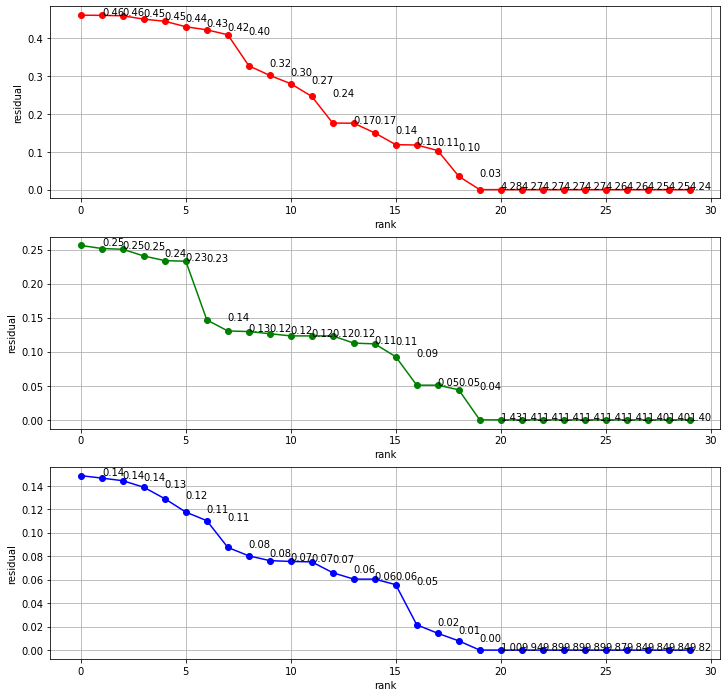

In [13]:
start = time.time()
# rank 
rank = linalg.matrix_rank(B.todense())
n = B.shape[1]
#print(n)
B_dense = B.todense()
# For Truncated SVD implementations
if rank == n:
    U, E, VT = np.linalg.svd(B_dense, full_matrices=False)
    V = VT.T
else:
    print("The rank is not same")
# residuals 
residual_1 = np.zeros(rank)
residual_2 = np.zeros(rank)
residual_3 = np.zeros(rank)

# this array will help to see, the errors of each quearys, with respect to the each column
q_1 = []
q_2 = []
q_3 = []
for i in range(1,30):
        
        # E inverse
        E_inverse = np.diag(np.hstack([1/E[:i], np.zeros(n-i)]))
        A_plus = V * E_inverse * U.T 
        
        # truncated SVD with query 1
        tsvd1 = A_plus*query_1
        # error
        els_tsvd1 = Norm((query_1-B *tsvd1),2)/sNorm(query_1)
        q_1.append(els_tsvd1)
        residual_1[i-1] = els_tsvd1
        
        # truncated SVD with query 2
        tsvd2 = A_plus*query_2
        #error
        els_tsvd2 = Norm((query_2-B_dense*tsvd2),2)/sNorm(query_2)
        q_2.append(els_tsvd2)
        residual_2[i-1] = els_tsvd2
       
        # truncated SVD with query 3
        tsvd3 = A_plus*query_3
        #error
        els_tsvd3 = Norm((query_3-B_dense*tsvd3),2)/sNorm(query_3)
        q_3.append(els_tsvd3)
        residual_3[i-1] = els_tsvd3
        

# printing the error of least squares
for i in range(0,30):
    if residual_1[i] < 0.1:
        print(f'The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k ={i} => {residual_1[i]}')
print("-----------------------------------------------------------------------------------")
for i in range(0,30):
    if residual_2[i] < 0.1:
        print(f'The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k ={i} => {residual_2[i]}')
print("-----------------------------------------------------------------------------------")
for i in range(0,30):    
    if residual_3[i] < 0.1:
        print(f'The residual of least square problem with Truncated SVD when it is lessthan 0.1 for k ={i} => {residual_3[i]}')
print("-----------------------------------------------------------------------------------")

# Plotting the results
fig =  plt.figure(figsize=(12,12))
# axis 1 will be the first position for the residual 1
axis_1 = fig.add_subplot(3,1,1)
# grid will help to visiualize the data with correct localization
axis_1.grid(True)
# X labels are rankings
axis_1.set_xlabel('rank')
# Y labels are residual
axis_1.set_ylabel('residual')

# without the text on point, we can able just visiualize the point.
for x,y in zip(np.arange(1,30), residual_1): 
    axis_1.text(x, y, str(y)[:4])
axis_1.plot(np.arange(0,30), residual_1, 'ro-')
    
# axis 2  will be at second position for the residual 2
axis_2 = fig.add_subplot(3,1,2)
axis_2.grid(True)
# X label
axis_2.set_xlabel('rank')
# y label
axis_2.set_ylabel('residual')

for x,y in zip(np.arange(1,30), residual_2): 
    axis_2.text(x, y, str(y)[:4])
    
axis_2.plot(np.arange(0,30), residual_2, 'go-')

# axis 3 will be at third position for the residual 3 
axis_3 = fig.add_subplot(3,1,3)
axis_3.grid(True)
axis_3.set_xlabel('rank')
axis_3.set_ylabel('residual')
        
for x,y in zip(np.arange(1,30), residual_3): 
    axis_3.text(x, y, str(y)[:4])
axis_3.plot(np.arange(0,30), residual_3, 'bo-')
end = time.time()
time_tsvd = end - start

## Cholesky Decomposition

In [14]:
strat = time.time()
# matrix B
B_dense = B.todense()
# Matrix B transpose
BT = B_dense.T
#print(BT)

# multiplying the B and B transpose
BTB = BT.dot(B_dense)

# implemeantation of cholesky 
CF = linalg.cholesky(BTB)

# y = AT b
y_1 = BT*(query_1)
# solve the lower triangular system Lz = y for z
z_1 = linalg.solve(CF, y_1)
# Solve the upper triangular system LTx = z for x 
x1 = linalg.solve(CF.T, z_1)
#error
els_ch1 = Norm((query_1-B*x1),2)/sNorm(query_1)
print('error of the least-squares solution: ||q1-B*x||', els_ch1)

# y = AT b
y_2 = BT*(query_2)
# solve the lower triangular system Lz = y for z
z_2 = linalg.solve(CF, y_2)
# Solve the upper triangular system LTx = z for x 
x2 = linalg.solve(CF.T, z_2)
#error
els_ch2 = Norm((query_2-B_dense*x2),2)/sNorm(query_2)
print('error of the least-squares solution: ||q2-B*x||', els_ch2)

# y = AT b
y_3 = BT*(query_3)
# solve the lower triangular system Lz = y for z
z_3 = linalg.solve(CF, y_3)
# Solve the upper triangular system LTx = z for x
x3 = linalg.solve(CF.T, z_3)
#error
els_ch3 = Norm((query_3-B_dense*x3),2)/sNorm(query_3)

print('error of the least-squares solution: ||q3-B*x||', els_ch3)
end = time.time()
time_cd = end - start

error of the least-squares solution: ||q1-B*x|| 4.243727210047836e-06
error of the least-squares solution: ||q2-B*x|| 1.401360850719778e-06
error of the least-squares solution: ||q3-B*x|| 9.823938075754066e-07


## Gradient Descent

In [15]:
def gradient(A, q, x):
    d_a = 2*(A.T * ((A * (x)) - q))
    return d_a
    
def Gradient_descent(A, q,tollerance,alpha):
    x0 = np.zeros((30,1))
    xk = np.zeros((30,1))
    gradient_x = gradient(A, q, x0)
    current_val = 1
    iteration = 0
    # iteration will continue till the absolute error is grather than then the tollerance 
    while(current_val > tollerance) and all(gradient_x!=0):
        xk = x0 - alpha * gradient_x
        current_val = linalg.norm(xk - x0)
        gradient_x = gradient(A, q, xk)
        x0 = xk
        iteration = iteration + 1
         
    return xk, current_val

In [16]:

start = time.time()
# computing the gradient descent 
gd1, res1= Gradient_descent(B, query_1, 1e-08,alpha= 0.0001)
print("shape of the Matrix of B:", B.shape)
# error of least square solution  with the query 1
els_gd1 = Norm((query_1-(B * gd1)),2)/sNorm(query_1)
print('error of the least-squares solution: ||q1-B*x||', els_gd1)

# error of least square solution  with the query 2
gd2, res2 = Gradient_descent(B_dense, query_2.todense(), 1e-12, alpha= 0.0001)
els_gd2 = Norm(query_2-B_dense*gd2)/sNorm(query_2)
print('error of the least-squares solution: ||q2-B*x||', els_gd2)

# error of least square solution  with the query 3
gd3, res3 = Gradient_descent(B_dense, query_3.todense(), 1e-12, alpha= 0.0001)
els_gd3 = Norm(query_3-B_dense*gd3)/sNorm(query_3)
print('error of the least-squares solution: ||q3-B*x||', els_gd3)
end = time.time()
time_gd = end - start

shape of the Matrix of B: (2000, 30)
error of the least-squares solution: ||q1-B*x|| 4.2936163612784555e-06
error of the least-squares solution: ||q2-B*x|| 1.4350520227569631e-06
error of the least-squares solution: ||q3-B*x|| 1.00049903859317e-06


## LGK Decompostion 

In [17]:
def LGK(A,b,k):
    
    (m,n) = A.shape
    toll = 1e-12
      # beta 
    beta = np.zeros((k+2,1))
    # alfa
    alfa = np.zeros((k+1,1))
    # alfag
    alfag = np.zeros((k+1,1))
    cg = np.zeros((k+1,1))
    da = np.zeros((k+1,1))
    du = np.zeros((k+1,1))
    sg = np.zeros((k+1,1))
    gam = np.zeros((31,1))
    P = np.zeros((m,k+2))
    Z = np.zeros((n,k+1))
    
    
    beta[0] = linalg.norm(b,2)
    gam[0] = beta[0]
    
    P[:,0] = b.reshape((2000,))/beta[0]
    wl = A.T.dot(P[:,0])
    alfa[0] = linalg.norm(wl,2)
    Z[:,0] = wl/alfa[0]
    
    wr = A.dot(Z[:,0]) - alfa[0]*P[:,0]
    beta[1] = linalg.norm(wr,2)
    P[:,1] = wr/beta[1]
    
    alfag[0] = alfa[0]
   
    
    for j in range (1,k+1):
        wl = A.T.dot(P[:,j]) - Z[:,j-1]*beta[j]
        alfa[j] = linalg.norm(wl,2)
        Z[:,j] = wl/alfa[j]
        wr = A.dot(Z[:,j]) - P[:,j]*alfa[j]
        beta[j+1] = linalg.norm(wr,2)
        P[:,j+1] = wr/beta[j+1]
        
        cg[j-1] = alfag[j-1]/np.sqrt(alfag[j-1]**2 + beta[j]**2)
        sg[j-1] = beta[j]/np.sqrt(alfag[j-1]**2 + beta[j]**2)
        alfag[j] = cg[j-1]*alfa[j]

        da[j-1] = cg[j-1]*alfag[j-1]+sg[j-1]*beta[j]
        du[j-1] = sg[j-1]*alfa[j]

        gam[j]=-gam[j-1]*sg[j-1]
        if (abs(alfa[j])<toll or abs(beta[j+1])<toll):
            break
    km=j-1
    y = np.zeros((km+1,1) )  #last element
    y[km]=gam[km]*cg[km]/da[km]
  
    for i in range(km-1,-1,-1):
        y[i]=(gam[i]*cg[i]-du[i]*y[i+1])/da[i]
        
    x=np.dot(Z[:,0:(km+1)],y[0:(km+1)])   
    
    return P,Z, alfa,beta, gam


The residual of least square problem with LGK when it is lessthan 0.1 for k =3 => [0.05586423]
The residual of least square problem with LGK when it is lessthan 0.1 for k =4 => [0.02302137]
The residual of least square problem with LGK when it is lessthan 0.1 for k =5 => [0.00852038]
The residual of least square problem with LGK when it is lessthan 0.1 for k =6 => [0.0029288]
The residual of least square problem with LGK when it is lessthan 0.1 for k =7 => [0.00125114]
The residual of least square problem with LGK when it is lessthan 0.1 for k =8 => [0.0004009]
The residual of least square problem with LGK when it is lessthan 0.1 for k =9 => [0.00011079]
The residual of least square problem with LGK when it is lessthan 0.1 for k =10 => [2.22112851e-05]
The residual of least square problem with LGK when it is lessthan 0.1 for k =11 => [1.83509174e-05]
The residual of least square problem with LGK when it is lessthan 0.1 for k =12 => [6.41075939e-06]
The residual of least square problem 

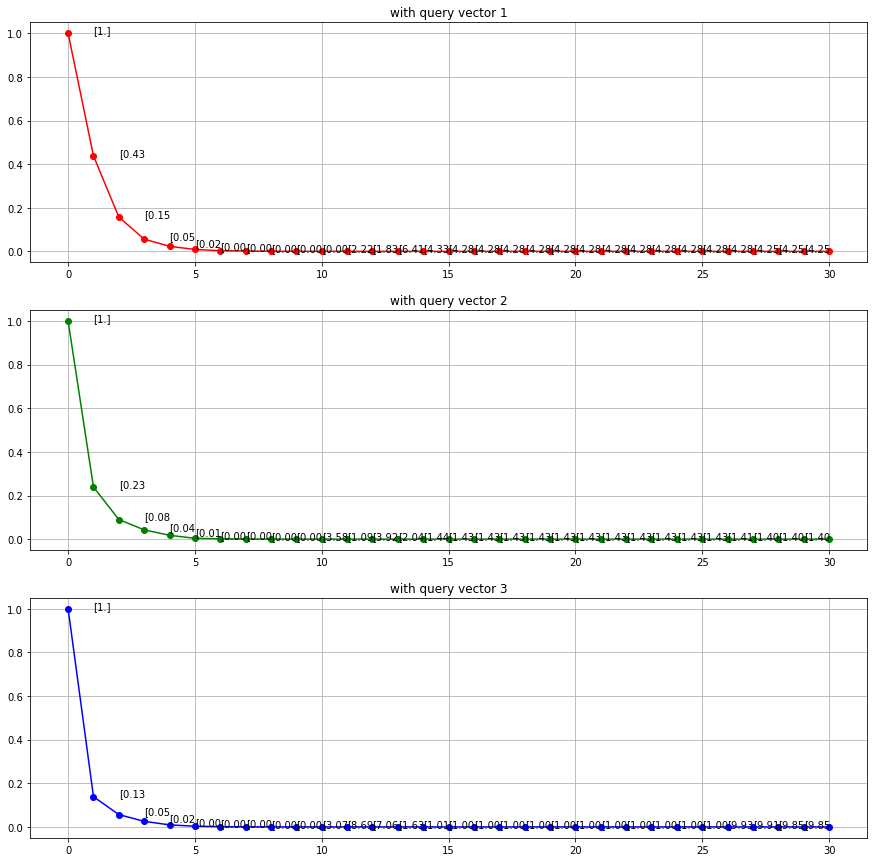

In [18]:
start = time.time()
# figure
fig =  plt.figure(figsize=(15,15))
# LGK implementation for the query 1
P1, Z1,alfa1,beta1, res1= LGK(B_dense,query_1.todense(),30)
els_lgk1 = abs(res1)/linalg.norm(query_1.todense(),2)
for i in range (0, len(els_lgk1)):
    if els_lgk1[i] < 0.1:
        print(f'The residual of least square problem with LGK when it is lessthan 0.1 for k ={i} => {els_lgk1[i]}')
print("------------------------------------------------------------------------------------------------")
# axis 1 for the first position
axis_1 = fig.add_subplot(3,1,1)
axis_1.set_title("with query vector 1")
axis_1.grid(True)
for x,y in zip(np.arange(1,30), els_lgk1): 
    axis_1.text(x, y, str(y)[:5])
axis_1.plot(els_lgk1, 'ro-')


# LGK implementation for the query 2
P2, Z2, alfa2,beta2, res2= LGK(B_dense,query_2.todense(),30)
els_lgk2 = abs(res2)/linalg.norm(query_2.todense(),2)
for i in range (0, len(els_lgk2)):
    if els_lgk2[i] < 0.1:
        print(f'The residual of least square problem with LGK when it is lessthan 0.1 for k ={i} => {els_lgk2[i]}')
print("------------------------------------------------------------------------------------------------")
# axis 2 for the second position
axis_2 = fig.add_subplot(3,1,2)
axis_2.set_title("with query vector 2")
axis_2.grid(True)
for x,y in zip(np.arange(1,30), els_lgk2): 
    axis_2.text(x, y, str(y)[:5])
axis_2.plot(els_lgk2, 'go-')


# lGK implementation for the query 2
P3, Z3, alfa3,beta3, res3= LGK(B_dense,query_3.todense(),30)
els_lgk3 = abs(res3)/linalg.norm(query_3.todense(),2)
for i in range (0, len(els_lgk3)):
    if els_lgk3[i] < 0.1:
        print(f'The residual of least square problem with LGK when it is lessthan 0.1 for k ={i} => {els_lgk3[i]}')
print("------------------------------------------------------------------------------------------------")
# axis 3 for the position 3
axis_3 = fig.add_subplot(3,1,3)
axis_3.set_title("with query vector 3")
axis_3.grid(True)
for x,y in zip(np.arange(1,30), els_lgk3): 
    axis_3.text(x, y, str(y)[:5])
axis_3.plot(els_lgk3, 'bo-')
end = time.time()
time_lgk = end - start

## Comparation of all Least Squares

The comparation results of QR, SVD, TRUNCATED SVD, CHOLESKEY, GRADIENT DECENT and LGK DECOMPOSITIONS are as follows

[4.243726781192512e-06, 4.243726781601256e-06, 4.2495129239787585e-06, 4.243727210047836e-06, 4.2936163612784555e-06, array([4.25522919e-06])]
[9.85037071e-07]
[0 1 2 3 4 5]


c:\users\chand\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
c:\users\chand\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


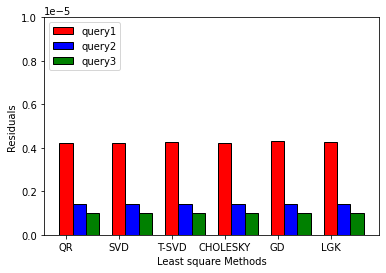

In [19]:
methods = ['QR','SVD','T-SVD','CHOLESKY','GD', 'LGK']
all_res1 = [els_qr1,els_svd1, residual_1[-2], els_ch1, els_gd1, els_lgk1[-2]]
print(all_res1)
all_res2 = [els_qr2,els_svd2, residual_2[-2], els_ch2, els_gd2, els_lgk2[-2]]
all_res3 = [els_qr3,els_svd3, residual_3[-2], els_ch3, els_gd3, els_lgk3[-2]]
print(els_lgk3[-2])

plt.ylim(0, 0.00001)

index = np.arange(len(methods))
print(index)
plt.bar(index + 0.00 , all_res1, color ='r', width= 0.25, edgecolor='black')
#addlabels(index, all_res1)
    
plt.bar(index + 0.25 , all_res2, color ='b', width= 0.25, edgecolor='black')
#for x,y in zip(np.arange(1,30), all_res2): 
    #plt.text(x, y, str(y)[:3])
    
plt.bar(index + 0.50 , all_res3, color ='g', width= 0.25, edgecolor='black')
#for x,y in zip(np.arange(1,30), all_res3): 
    #plt.text(x, y, str(y)[:3])

plt.xticks(index, methods)
plt.xlabel('Least square Methods')
plt.ylabel('Residuals')

plt.legend(labels=['query1','query2','query3'], loc='upper left')
plt.show()

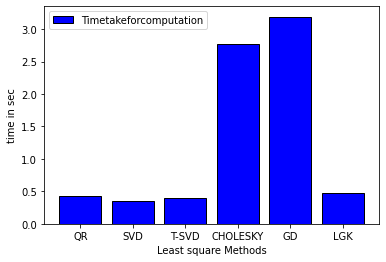

In [20]:
methods = ['QR','SVD','T-SVD','CHOLESKY','GD', 'LGK']
alltime = [time_qr, time_svd, time_tsvd, time_cd, time_gd, time_lgk]

plt.bar(methods, alltime, color ='b', edgecolor='black')

plt.xlabel('Least square Methods')
plt.ylabel('time in sec')

plt.legend(labels=['Timetakeforcomputation'], loc='upper left')
plt.show()

# Task 2 

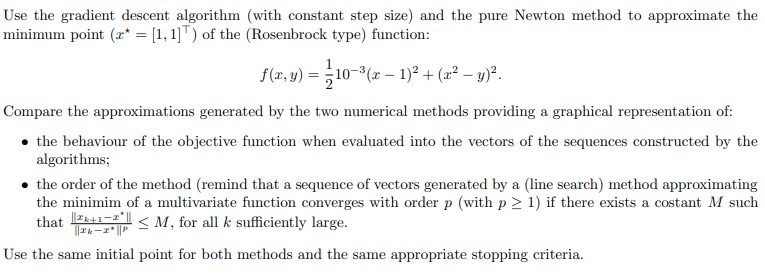

In [21]:
from scipy.linalg import norm, inv
import numpy as np
import math
from math import log

import scipy
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import time
from ipywidgets import interactive

## Function

In [22]:
def functn(a):
    x, y = a
    return 0.5 * 0.001 * (x - 1)**2 + (x**2 - y)**2

## Order of convergence

In [23]:
def order_p_and_M(iteration,err_abs, q):
    orderP = []
    m = []
    init = 0
    while init < iteration:
        if init > 1:
            #orderP.append(log)
            alpha_ = (log((err_abs[init])/(err_abs[init-1]))/log((err_abs[init -1])/(err_abs[init -2])))
            orderP.append(alpha_)
            m.append((err_abs[init])/(err_abs[init-1])**alpha_)
        init = init + 1
    return orderP, m

## Gradient Descent

In [24]:
def gradient(a):
    x, y = a
    dx = 4 * (x *(0.00025 - y) + pow(x,3) - 0.00025)
    dy = 2*y - 2*(x)**2
    return np.array([dx,dy])

In [25]:
def gradientDescent(X,maximum_iteration,toll, alfa = 0.001, iteration = 0):
    # soln_x is next position value, at starting with 1, 1 shape and filled with zeros
    soln_x = np.zeros((1,1))
    # saving each and every step solns values as solnx_history
    solnx_history = []
    current_step = 1
    # saving the function history
    historyoffunction = []
    # save the error
    err_abs = []
    # result are like table, saving the each soln_x and each iteration
    result = np.empty((0,2))
    solnx_history.append(X)
    
    # starting point has to be compute with gradient.
    g = gradient(X)
    
    
    # condition to stop the iterattion process using the present iteration is less than total number of iteration,
    #  if the current position is less than the tol
    while all(g!=0) and (current_step > toll) and (iteration < maximum_iteration): 
        
        # g is gradient, it will be update after every iteration
        # X current position
        # alfa = 0.001 , we have tried with low running rate
        soln_x = X - alfa * g 
        
        # saving the infprmation both iteration and soln of X
        result = np.vstack((result, [soln_x,iteration]))
        
        # update the G value
        g = gradient(soln_x)
        
        # it is nothing but error ||xn - x*|| also it will help to find the order, 
        current_step = scipy.linalg.norm(soln_x - X)
        # saving the information 
        err_abs.append(current_step)
        
        # increment the iteration value
        iteration = iteration + 1
        
        # every time, we are evaluation the current position with function i.e f(x[0], x[1]) = f(x,y)
        historyoffunction.append(functn(X))
        
        # changing the position like current position as previous position
        X = soln_x
        solnx_history.append(soln_x)
    # the output will be last solution of x
        # iteration value
        # history of function that is f(x,y)
        # errors
        # result i.e solution of x with the respect to the iteration
    return soln_x, iteration, historyoffunction,solnx_history, err_abs, result

In [26]:
# gradient descent
start = time.time()
sol_gradientDescent, numberofiteration, historyoffunction_gradientDescent, solnhistory_gradientDescent, err_abs_, table = gradientDescent(np.array([2, 1]),100,1e-6)
end = time.time()
Task2_GD = end - strat

c:\users\chand\appdata\local\programs\python\python37\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [27]:
# viewing the solution of graident descent for each iteration
i = 0
while i < len(table[:,0]):
    print(f"For the iteration {table[i,1]} the solution of Gradient Descent method is {table[i,0]}")
    i = i+1

For the iteration 0 the solution of Gradient Descent method is [1.975999 1.006   ]
For the iteration 1 the solution of Gradient Descent method is [1.95308772 1.01179714]
For the iteration 2 the solution of Gradient Descent method is [1.93119067 1.01740265]
For the iteration 3 the solution of Gradient Descent method is [1.91023945 1.02282684]
For the iteration 4 the solution of Gradient Descent method is [1.89017195 1.02807922]
For the iteration 5 the solution of Gradient Descent method is [1.8709316  1.03316856]
For the iteration 6 the solution of Gradient Descent method is [1.85246675 1.03810299]
For the iteration 7 the solution of Gradient Descent method is [1.83473016 1.04289005]
For the iteration 8 the solution of Gradient Descent method is [1.81767848 1.04753674]
For the iteration 9 the solution of Gradient Descent method is [1.80127189 1.05204958]
For the iteration 10 the solution of Gradient Descent method is [1.78547371 1.05643464]
For the iteration 11 the solution of Gradient 

In [28]:
print('The approximate solution of the Gradient Descent method is: ',sol_gradientDescent,' which converges with ', numberofiteration,' iterated \n')

The approximate solution of the Gradient Descent method is:  [1.27129546 1.22584167]  which converges with  100  iterated 



### Graphical representation for order and behaviour of object function

c:\users\chand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # Remove the CWD from sys.path while we load stuff.


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

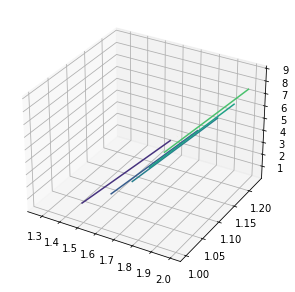

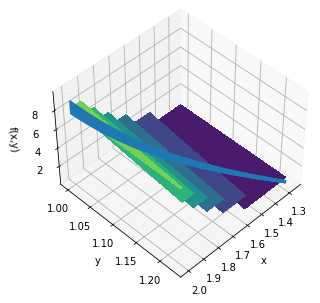

In [29]:
x1=[]
x2 = []
for i in solnhistory_gradientDescent:
    x1.append(i[0])
    x2.append(i[1])
    

# Initialize figure 
figRos = plt.figure(figsize=(5, 5))
axRos = figRos.gca(projection='3d')


X, Y = np.meshgrid(x1, x2)
Z = functn([X,Y])

X, Y = np.meshgrid(x1, x2)
plt.contour(x1, x2, Z)
def plotter(E, A):
    fig = plt.figure(figsize = [5, 5])
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1, x2, Z, cmap='GnBu', alpha=0.8)
    ax.plot_wireframe(x1, x2, Z, rcount=15, ccount=15)
    ax.view_init(elev=E, azim=A)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.contourf(x1, x2, Z)
plotter(45, 45)
iplot = interactive(plotter, E = (-90, 90, 5),
                             A = (-90, 90, 5))
iplot

In [30]:
order_P_gradientDescent, M_values = order_p_and_M(numberofiteration, err_abs_, 1)

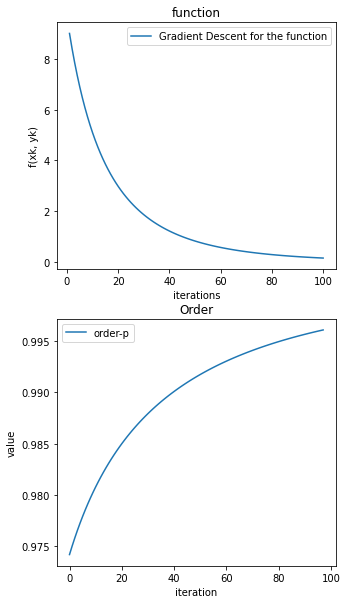

In [31]:
plt.figure(figsize = (5, 10))
plt.subplot(211)
plt.plot(np.arange(1,numberofiteration+1),historyoffunction_gradientDescent,label='Gradient Descent for the function') 
plt.legend()
# iterations
plt.xlabel('iterations')
plt.ylabel('f(xk, yk)')
plt.title("function")
plt.subplot(212)
plt.plot(np.arange(numberofiteration-2),order_P_gradientDescent, '-', label='order-p')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('value')
plt.title("Order")
plt.show()

In [32]:
# P_ ORDER OF THE METHOD
i = len(order_P_gradientDescent)
print("The order of convergence of gradient descent: ",round(order_P_gradientDescent[i-2]))
print("The M value is ", (M_values[i-2]))

The order of convergence of gradient descent:  1
The M value is  0.9599602316487349


## Newton Method

In [33]:
def hessian(a):
    x, y = a
    dxx =  12 * (x**2 - 0.333333 * y + 0.0000833333) # which is nothing but  12x^2 - 4y + 0.001
    dxy = -4* x # -4x
    dyx = -4* x # -4x
    dyy = 2 
    return np.array([[dxx,dxy],[dyx,dyy]])

In [34]:
def newtonmethod(X, maximum_iteration, toll, iteration = 0):
     # soln_x is next position value, at starting with 1, 1 shape and filled with zeros
    soln_x = np.zeros((1,1))
    # saving each and every step solns values as solnx_history
    solnx_history = []
    current_step = 1
    # saving the function history
    historyoffunction = []
    # save the error
    err_abs = []
    # result are like table, saving the each soln_x and each iteration
    result = np.empty((0,2))
    solnx_history.append(X)
    
    # the initial step is the derviate of the input
    X = gradient(X)
    
    # condition to stop the iterattion process using the present iteration is less than total number of iteration,
    #  if the current position is less than the tol
    while (current_step > toll) and (iteration < maximum_iteration):
        
        # solving the hessian matrix and gradient matrix
        dn_slove = scipy.linalg.solve(hessian(X), -gradient(X))
        
        # dv it will be update after every iteration
        # X current position
        soln_x = X + dn_slove
        
        # saving the results
        result = np.vstack((result, [soln_x,iteration]))
        
        # it is nothing but error ||xn - x*|| also it will help to find the order, 
        current_step = scipy.linalg.norm(soln_x - X)
        
        # saving the information
        err_abs.append(scipy.linalg.norm(soln_x - X))
        
        # increment the iteration with 1
        iteration = iteration + 1
        
        # saving the function history
        historyoffunction.append(functn(X))
        
        # update the X value as soln X
        X = soln_x
        
        # saving the information
        solnx_history.append(soln_x)
        
        
    return soln_x, iteration, historyoffunction,solnx_history, result, err_abs

In [35]:
start = time.time()
sol_nn, num_iternn, functionnewtonmethod, x_history_nn, table_nn, err_abs_nn = newtonmethod(np.array([2,1]),100,1e-6)
end = time.time()
Task2_Newton = end -start

c:\users\chand\appdata\local\programs\python\python37\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [36]:
i = 0
while i < len(table_nn[:,0]):
    print(f"\nFor the iteration {table_nn[i,1]} the solution of newton method is {table_nn[i,0]}")
    i = i+1

print('\nThe solution of the the solution of newton method is: ',sol_nn,' which converges with ',num_iternn,' iterated \n')


For the iteration 0 the solution of newton method is [ 24.00099012 576.04752677]

For the iteration 1 the solution of newton method is [ 17.03983188 241.89814626]

For the iteration 2 the solution of newton method is [ 17.03974913 290.35305025]

For the iteration 3 the solution of newton method is [ 9.61888381 37.4536838 ]

For the iteration 4 the solution of newton method is [ 9.61884469 92.52217307]

For the iteration 5 the solution of newton method is [  3.32815071 -28.49624349]

For the iteration 6 the solution of newton method is [ 3.328136   11.07648926]

For the iteration 7 the solution of newton method is [ 1.09877501 -3.76274392]

For the iteration 8 the solution of newton method is [1.09877004 1.2072956 ]

For the iteration 9 the solution of newton method is [1.00047466 0.99128756]

For the iteration 10 the solution of newton method is [1.00046269 1.00092559]

For the iteration 11 the solution of newton method is [1.00000185 1.00000348]

For the iteration 12 the solution of 

In [37]:
print('The approximate solution of the Gradient Descent method is: ',sol_nn,' which converges with ', num_iternn,' iterated \n')

The approximate solution of the Gradient Descent method is:  [1. 1.]  which converges with  14  iterated 



### Graphical representation for order and behaviour of object function

c:\users\chand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # Remove the CWD from sys.path while we load stuff.


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

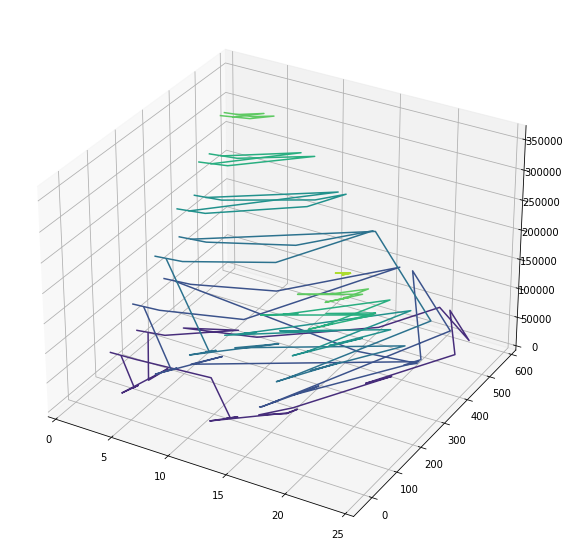

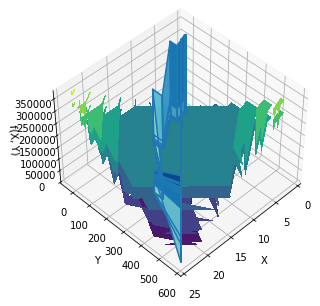

In [38]:
x1 = []
x2 = []
for i in x_history_nn:
    x1.append(i[0])
    x2.append(i[1])
    
# GRAPH 1
# Initialize figure 
figRos = plt.figure(figsize=(10, 10))
axRos = figRos.gca(projection='3d')


X, Y = np.meshgrid(x1, x2)
Z = functn([X,Y])

X, Y = np.meshgrid(x1, x2)
plt.contour(x1, x2, Z)
def plotter(E, A):
    fig = plt.figure(figsize = [5, 5])
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1, x2, Z, cmap='GnBu', alpha=0.8)
    ax.plot_wireframe(x1, x2, Z, rcount=15, ccount=15)
    ax.view_init(elev=E, azim=A)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.contourf(x1, x2, Z)
plotter(45, 45)
iplot = interactive(plotter, E = (-90, 90, 5),
                             A = (-90, 90, 5))
iplot

In [39]:
order_P_newton, m_val = order_p_and_M(num_iternn, err_abs_nn, 2)

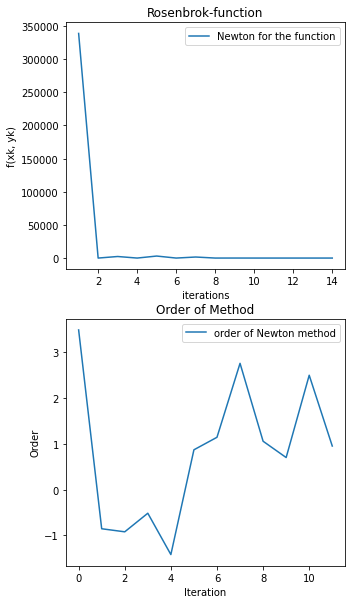

In [40]:
plt.figure(figsize = (5, 10))
plt.subplot(211)
plt.plot(np.arange(1,num_iternn+1), functionnewtonmethod, label='Newton for the function')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('f(xk, yk)')
plt.title('Rosenbrok-function')

plt.subplot(212)

plt.plot(np.arange(num_iternn-2), order_P_newton, '-', label='order of Newton method')
plt.xlabel("Iteration")
plt.ylabel("Order")
plt.title("Order of Method")
plt.legend()
plt.show()


In [41]:
# order 
print("The value of m", m_val[len(order_P_newton)- 2])
print("The order of convergence is: ",round(order_P_newton[len(order_P_newton)- 2]))


The value of m 109.44492407795768
The order of convergence is:  2


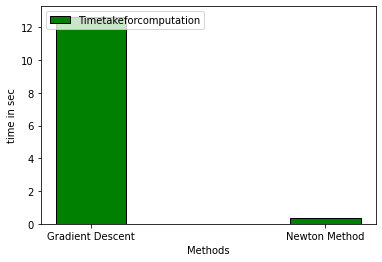

In [42]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])


methods = ['Gradient Descent', 'Newton Method']
alltime = [Task2_GD,Task2_Newton]

plt.bar(methods, alltime, color ='g', edgecolor='black' , width = 0.3)

plt.xlabel('Methods')
plt.ylabel('time in sec')

plt.legend(labels=['Timetakeforcomputation'], loc='upper left')
plt.show()
